# Análise exploratória de dados com Pandas

Fonte: https://mlcourse.ai/


O objetivo central desta análise é compreender o comportamento dos clientes que cancelaram suas assinaturas em um determinado serviço de telefonia.




In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")

Link para a base de dados: https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas/data?select=telecom_churn.csv

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('telecom_churn.csv')

Saving telecom_churn.csv to telecom_churn.csv


In [ ]:
backup = df.copy()

In [ ]:
#df = backup.copy()

## Análise geral 

O primeiro passo é conhecer os dados que a base fornece 

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Até aqui podemos tirar algumas informações:

1. O dataset possui 20 colunas e 3333 linhas;
2. Os dados estão indexados de forma sequencial de 0 a 3332;
3. Não existem dados nulos (**o que não significa que não existam dados ausentes**);
4. O atributo Churn, principal objeto de análise deste trabalho, é binário;
5. Os atributos "International plan" e "Voice mail plan" são do tipo `object`, mas seu conteúdo é booleano;
6. O atributo "Area code" é numérico, contudo, análises estatísticas quantitativas como média, moda, histograma, etc. não fazem sentido, uma vez que seus dados são categóricos. Para evitar análises indevidas, vale a pena convertê-lo para um tipo de dado categórico;
7. De modo semelhante, a variável "State" também possui conteúdo do tipo categórico;
8. A maioria das informações disponíveis são relacionadas ao consumo de serviços de telefonia e o custo cobrado pelo cosumo. 


In [ ]:
converter = {'No' : False, 'Yes' : True}
df['International plan'] = df['International plan'].map(converter)
df = df.replace({'Voice mail plan': converter})
df['Area code'] = df['Area code'].astype('category')
df['State'] = df['State'].astype('category')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   State                   3333 non-null   category
 1   Account length          3333 non-null   int64   
 2   Area code               3333 non-null   category
 3   International plan      3333 non-null   bool    
 4   Voice mail plan         3333 non-null   bool    
 5   Number vmail messages   3333 non-null   int64   
 6   Total day minutes       3333 non-null   float64 
 7   Total day calls         3333 non-null   int64   
 8   Total day charge        3333 non-null   float64 
 9   Total eve minutes       3333 non-null   float64 
 10  Total eve calls         3333 non-null   int64   
 11  Total eve charge        3333 non-null   float64 
 12  Total night minutes     3333 non-null   float64 
 13  Total night calls       3333 non-null   int64   
 14  Total night charge      

Agora vamos dar uma olhada na distribuição dos dados

## Análise univariada

Na análise univariada nós analisamos cada coluna individualmente a fim de observar como seus dados estão distribuídos.

Para atributos quantitativos utilizamos funções estatísticas e gráficos como histograma e boxplot para observar as faixas de valores, zonas de maior densidade, existência de outliers, se os dados seguem uma distribuição normal, etc.       

Já com os atributos categóricos busca-se identificar quantas categorias possuem, se há balanceamento, se existem categorias duplicadas, subamostradas, sobreamostradas, irrelevantes, quais são as mais frequentes, as menos frequentes, etc.

### Atributos quantitativos

Uma boa forma de começar é utilizando a função `describe()`.

In [ ]:
df.describe()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


De modo geral, pode-se observar que os dados estão bem distribuídos entre os quartis e não há presença destacável de outliers, uma vez que a média e a mediana dos atributos são bem similares. Exceção a essa regra é observada apenas para a coluna "Number vmail messages", comportamento que será analisado com maior profundidade mais a frente.

In [ ]:
df['Voice mail plan'].value_counts()

False    2411
True      922
Name: Voice mail plan, dtype: int64

Cerca de 72% dos usuários não possuem o serviço de correio de voz. Assim sendo, como será o comportamento do atributo "Number vmail messages" para os clientes que possuem plano de voz?

In [ ]:
(df['Number vmail messages'])[df['Voice mail plan']].describe()

count    922.00
mean      29.28
std        7.56
min        4.00
25%       24.00
50%       29.00
75%       34.00
max       51.00
Name: Number vmail messages, dtype: float64

De fato os dados não são bem distribuídos, vamos visualizar esses dados para compreendêlos melhor.

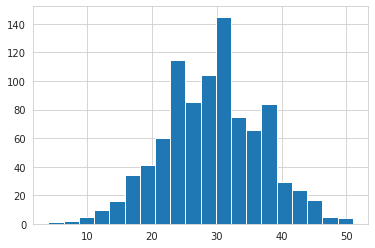

In [ ]:
(df['Number vmail messages'])[df['Voice mail plan']].hist(bins=20)

Vamos analisar as outras variáveis

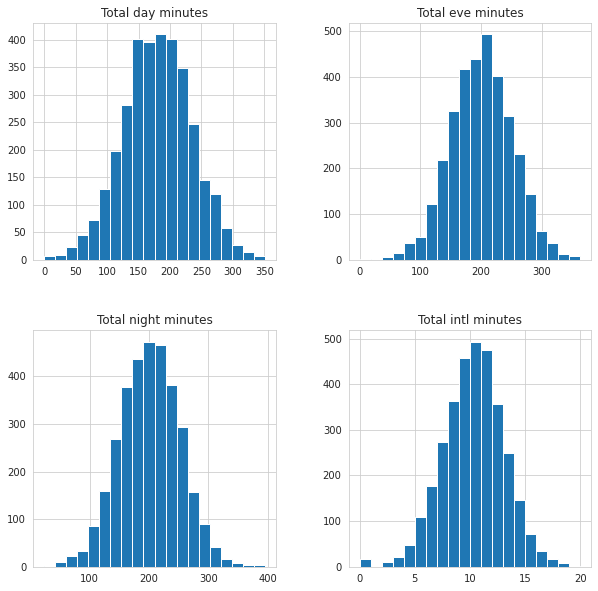

In [ ]:
features = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']
df[features].hist(figsize=(10, 10), bins=20);

A partir dos gráficos acima é possível observar que os atributos relacionados a quantidade de minutos em ligações por turno possuem faixas de valor similares bem como seguem distribuições normais com média e desvio padrão também similares.

A quantidade de minutos em ligações internacionais também seguem uma distribuição normal, mas esse tipo de ligação costuma ser muito mais raras e curta, de variando entre 0 e 20 minutos. 

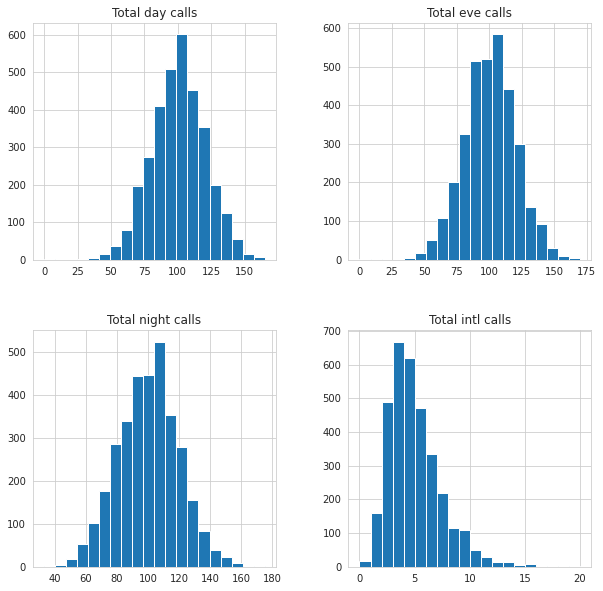

In [ ]:
features = ['Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls']
df[features].hist(figsize=(10, 10), bins=20);

O mesmo comportamento é observado quando analisamos a quantidade de ligações por turno e ligações internacionais.

A única diferença é que o número de ligações internacionais possui uma leve cauda à direita, mas isso pode ser facilmente resolvido com uma mudança de escala:

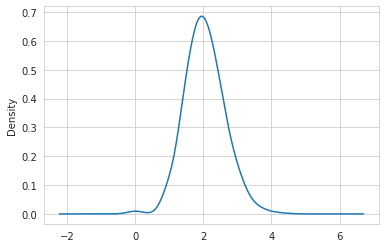

In [ ]:
(df['Total intl calls']**(1/2)).plot(kind='density', bw_method=0.4);

Outra forma interessante de analisar este atributo seria com o boxplot:

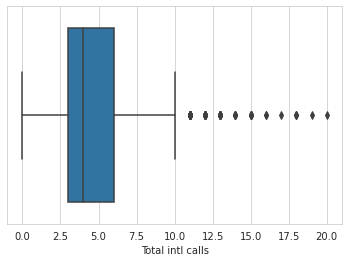

In [ ]:
sns.boxplot(x=df["Total intl calls"])

Assim fica mais evidente que a cauda observada no histograma é formada por um número pouco expressivo de outliers.

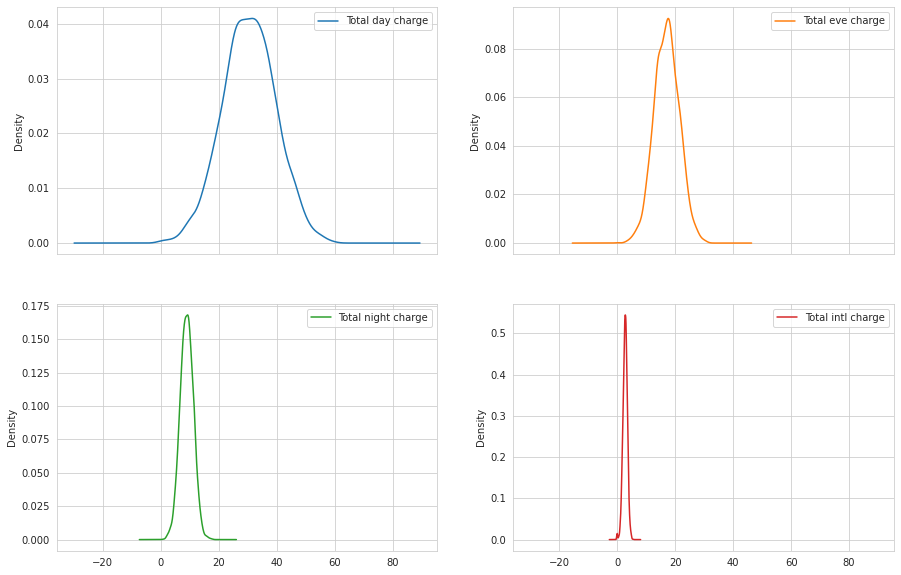

In [ ]:
features = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
df[features].plot(kind='density', subplots=True, layout=(2, 2), figsize=(15, 10));

As variáveis relacionadas aos valores cobrados também seguem distribuições normais. Nota-se também uma clara diferença entre as tarifas das ligações por turno, uma vez que o número total de minutos é similar, mas a distribuição dos valores cobrados possuem faixas mais distintas.

Resta analisar o atributo 'Customer service calls' que se refere ao número de ligações do cliente para a operadora.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


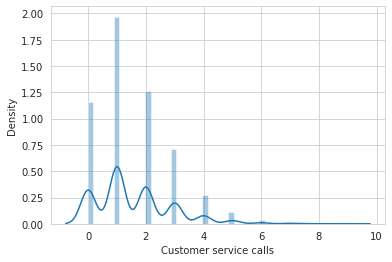

In [ ]:
sns.distplot(df['Customer service calls']);

O gráfico acima deixa claro que, ainda que o atributo em questão seja numérico, seu conteúdo é claramente categórico.

In [ ]:
df['Customer service calls'] = df['Customer service calls'].astype('category')

### Atributos categóricos

Como pode ser visto acima, a função `describe()` por padrão exibe apenas estatísticas de atributos numéricos. Para ver as estatísticas sobre atributos não numéricos, é necessário indicar explicitamente os tipos de dados de interesse no parâmetro `include`.

In [ ]:
df.describe(include=['category', 'bool'])

,State,Area code,International plan,Voice mail plan,Customer service calls,Churn
count,3333,3333,3333,3333,3333,3333
unique,51,3,2,2,10,2
top,WV,415,False,False,1,False
freq,106,1655,3010,2411,1181,2850


Para um olhar mais aprofundado sobre atributos categóricos e boleanos, podemos utilizar o método `value_counts()`. Vamos analisar a variável `Churn`:

In [ ]:
categorical_features = df.select_dtypes(include=['category', 'bool']).columns

In [ ]:
for att in categorical_features:
  print(att, '\n')
  print(df[att].value_counts())
  print("=========================", '\n')

State 

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
NV     66
CO     66
WA     66
MA     65
MS     65
RI     65
AZ     64
MO     63
FL     63
ME     62
NM     62
ND     62
NE     61
DE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

Area code 

415    1655
510     840
408     838
Name: Area code, dtype: int64

International plan 

False    3010
True      323
Name: International plan, dtype: int64

Voice mail plan 

False    2411
True      922
Name: Voice mail plan, dtype: int64

Customer service calls 

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

Churn 

False    2850
True      483

Para calcular a proporção dos dados para cada nível podemos utilizar o parâmetro `normalize=True` da `value_counts()`.

In [ ]:
for att in categorical_features:
  print(att, '\n')
  print(df[att].value_counts(normalize=True))
  print("=========================", '\n')

State 

WV    0.03
MN    0.03
NY    0.02
AL    0.02
OH    0.02
WI    0.02
OR    0.02
WY    0.02
VA    0.02
CT    0.02
VT    0.02
MI    0.02
ID    0.02
UT    0.02
TX    0.02
IN    0.02
KS    0.02
MD    0.02
NJ    0.02
NC    0.02
MT    0.02
NV    0.02
CO    0.02
WA    0.02
MA    0.02
MS    0.02
RI    0.02
AZ    0.02
MO    0.02
FL    0.02
ME    0.02
NM    0.02
ND    0.02
NE    0.02
DE    0.02
OK    0.02
SC    0.02
SD    0.02
KY    0.02
IL    0.02
NH    0.02
AR    0.02
GA    0.02
DC    0.02
HI    0.02
TN    0.02
AK    0.02
LA    0.02
PA    0.01
IA    0.01
CA    0.01
Name: State, dtype: float64

Area code 

415    0.50
510    0.25
408    0.25
Name: Area code, dtype: float64

International plan 

False    0.9
True     0.1
Name: International plan, dtype: float64

Voice mail plan 

False    0.72
True     0.28
Name: Voice mail plan, dtype: float64

Customer service calls 

1    3.54e-01
2    2.28e-01
0    2.09e-01
3    1.29e-01
4    4.98e-02
5    1.98e-02
6    6.60e-03
7    2.70e-03
9    6.00e

Outro grande aliado para análise de dados categóricos é o gráfico de barras.

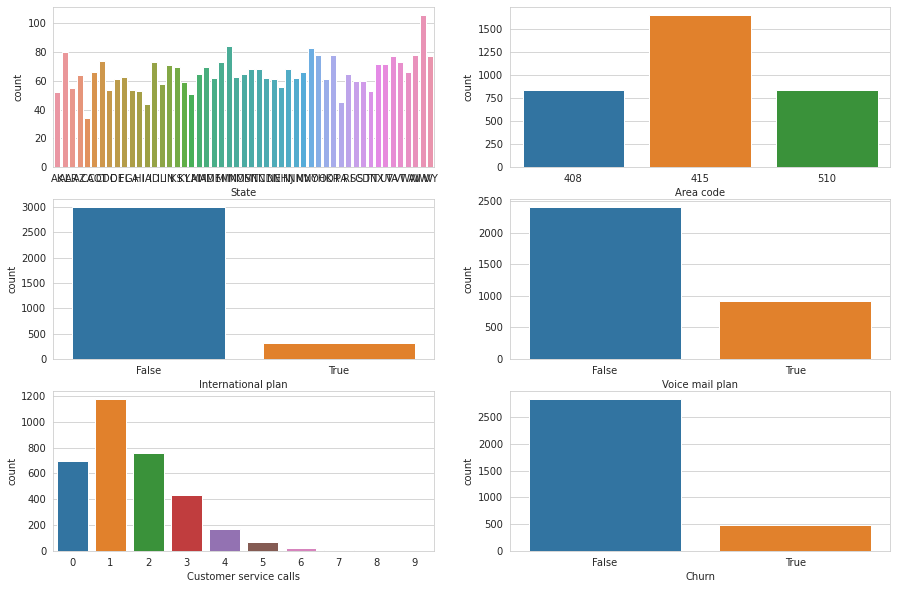

In [ ]:
df[categorical_features]

_, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
n = 0
for i in range(3):
  for j in range(2):
    sns.countplot(x=categorical_features[n], data=df, ax=axes[i,j])
    n += 1;

Com base no que foi apresentado acima, podemos tirar as seguintes observações:

1. A base possui pouca variação na quantidade de usuários por estado, tendo menor expressão apenas nos estados Pensilvânia, Iowa e Califórnia;

2. Metade da base é possui código de área 415, a outra metade é igualmente distribuída pelos códigos 408 e 510. É estranho só existirem esses três códigos de área, uma vez que eles pertencem apenas ao estado da Califórnia;

3. Apenas 10% dos clientes possui plano de ligações internacionais;

4. 28% dos clientes possui serviço de correio de voz;

5. O número máximo de vezes que um cliente ligou para a operadora foi 9. Contudo, clientes que ligam mais de 5 vezes são raros, o que permite uma redução do número de categorias deste atributo a partir da junção das categorias 6, 7, 8 e 9.

In [ ]:
df['Customer service calls'].cat.add_categories('6+', inplace=True)

In [ ]:
df['Customer service calls'][df['Customer service calls'].isin([6, 7, 8, 9])] = '6+'

In [ ]:
df['Customer service calls'].cat.remove_categories([6, 7, 8, 9], inplace=True)

In [ ]:
df['Customer service calls'].value_counts()

1     1181
2      759
0      697
3      429
4      166
5       66
6+      35
Name: Customer service calls, dtype: int64

## Análise multivariada

A análise multivariada permite observer as relações entre duas ou mais variáveis diferentes. Assim como no caso da análise univariada, a estratégia de análise vai depender dos tipos de dado das variáveis envolvidas.

### Quantitativa x Quantitativa





O primeiro passo geralmente empenhado para analisar a relação entre variáveis quantitativas é gerando a matriz de correlação:

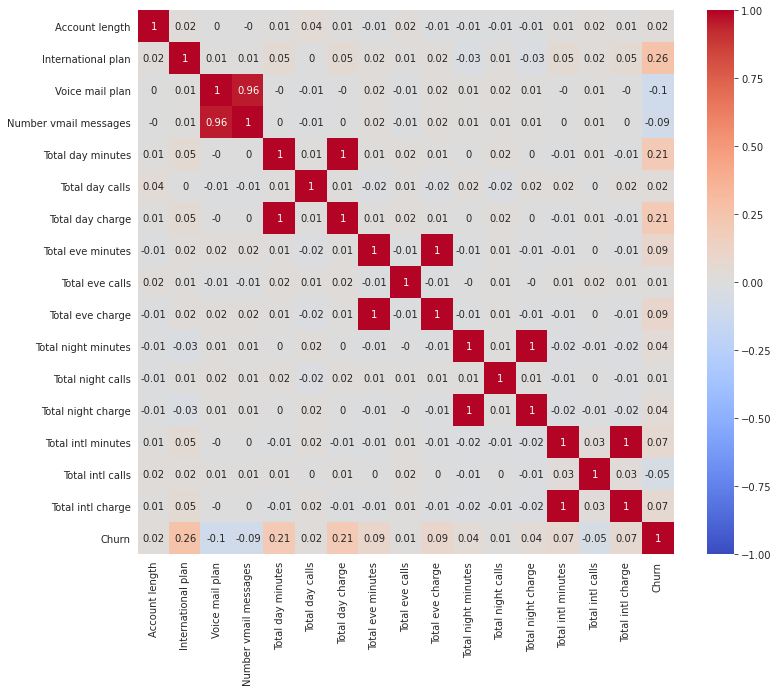

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 10)
sns.heatmap(round(df.corr(),2), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')


A matriz de correlação permite observar algumas coisas:

1. Nenhum dos atributos da base possui correlação significativa com o target;

2. Como já era esperado, os atributos relacionados a ligações em mesmo turno (número de ligações, total de minutos e cobrança), assim como ligações internacionais, possuem correlação positiva máxima. Essas variáveis são consideradas *dependentes* e podem ser removidas da base por não contribuir novas informações;

3. Da mesma forma, a quantidade de mensagens de correio de voz está fortemente correlacionada ao fato de o usuário possuir ou não o plano de correio de voz;

4. Excetuando as relações acima destacadas, os demais atributos da base não possuem correlação significativa entre si.



Dada a redundância acima identificada, vamos descartar da análise as variáveis de cobrança e contagem de ligações e manter apenas as contagem de minutos.

In [ ]:
numerical = ['Total day minutes', 'Total eve minutes', 
             'Total night minutes', 'Total intl minutes', 
             'Account length', 'Number vmail messages']

Outra forma de visualizar correlações e tendências dos dados é utilizando o `scatterplot()`

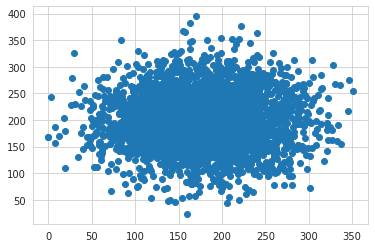

In [ ]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);

Como resultado temos um gráfico de duas variáveis normalmente distribuídas, o que não traz muita informação relevate, só reforça que a correlação entre essas variáveis é irrelevante. Essa figura eliptica centralizada entre os eixos é característica desse comportamento.

O seaborn oferece uma forma um pouco mais completa de visualização de um gráfico de disperção.

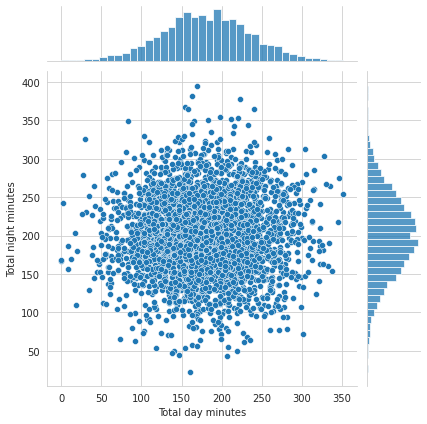

In [ ]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='scatter');



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


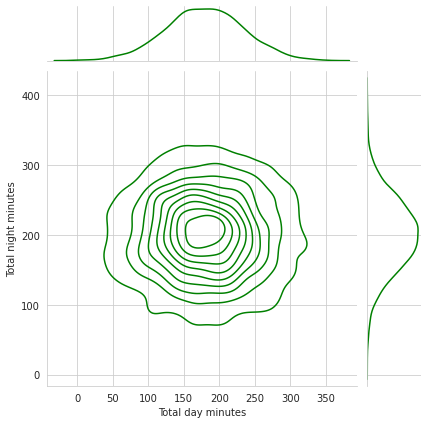

In [ ]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df,
              kind="kde", color="g");

Em alguns casos, podemos querer plotar uma matriz de gráfico de dispersão como a mostrada abaixo. Sua diagonal contém as distribuições das variáveis correspondentes, e os gráficos de dispersão para cada par de variáveis preenchem o restante da matriz.

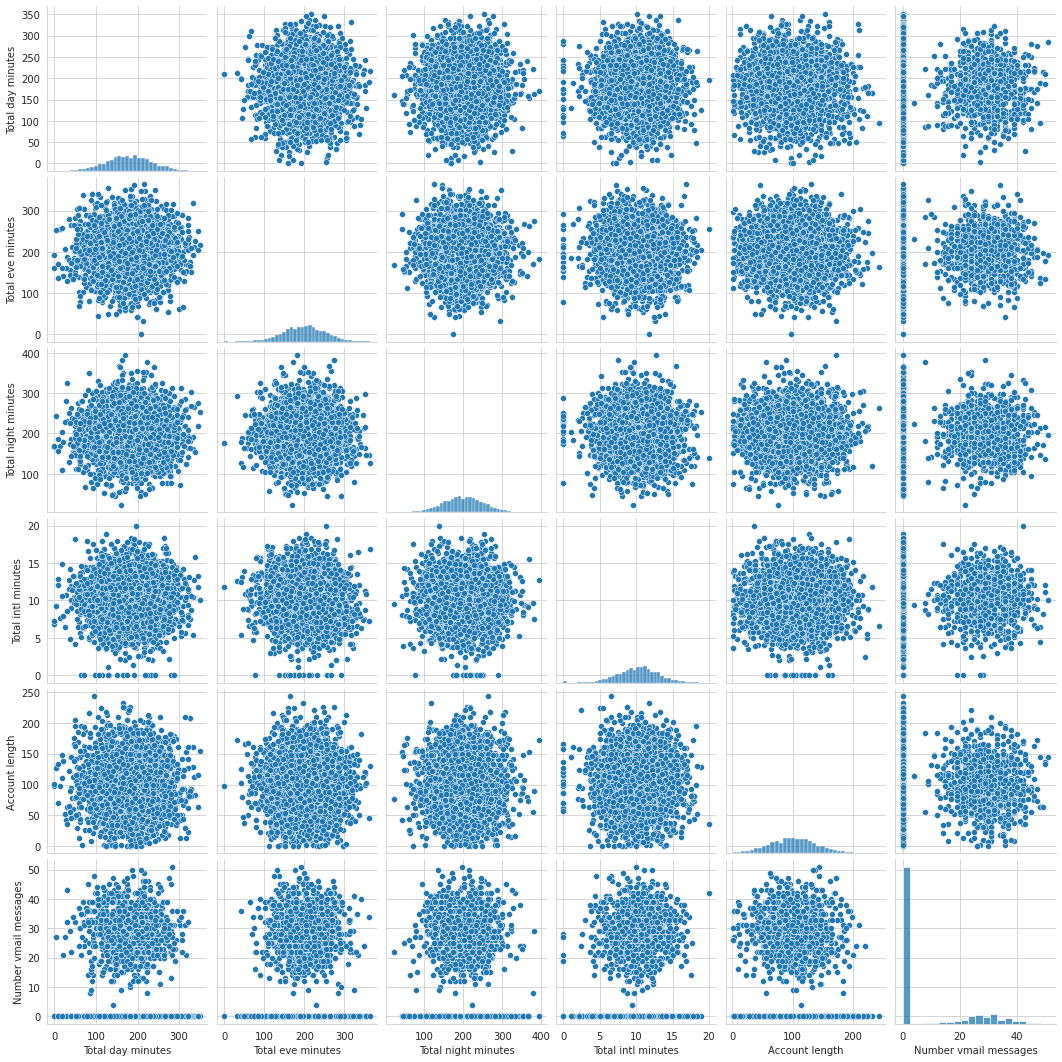

In [ ]:

# `pairplot()` pode ficar muito lento no formato SVG ou retina
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

A versão padrão do pairplot vem com uma diagonal exibindo a distribuição de cada variável com um histograma e o restante da matriz é formada por gráficos de disperção entre todos os pares de variáveis, mas existem outras configurações disponíveis.

In [ ]:
#retorndando para o formato retina, cuja qualidade da imagem é melhor que png.
%config InlineBackend.figure_format = 'retina' 

### Quantitativo x Categórico

Aqui podemos elevar o nível dos nossos gráficos quantitativos analisando como a distribuição dos dados muda de acordo com os diferentes níveis da nossa variável target ('Churn') a fim de obter novos *insights*. 




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


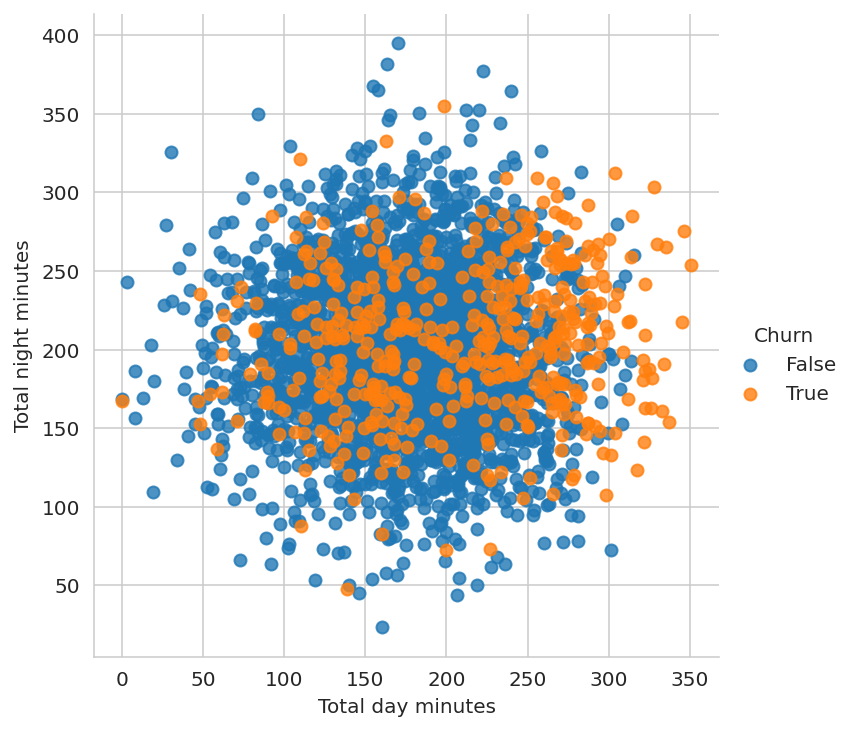

In [ ]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, hue='Churn', fit_reg=False);

O gráfico dá um leve indicativo de que os clientes que saíram estão um pouco mais concentrados mais a esquerda e acima do gráfico, caracterizando pessoas que realizam mais ligações durante o dia e a noite. 

Contudo, esse comportamento não é suficientemente claro para permitir conclusções confiáveis.

Agora, vamos criar boxplots para visualizar as estatísticas de distribuição das variáveis numéricas em dois grupos disjuntos: os clientes fiéis (`Churn = False`) e aqueles que saíram (` Churn = True`).

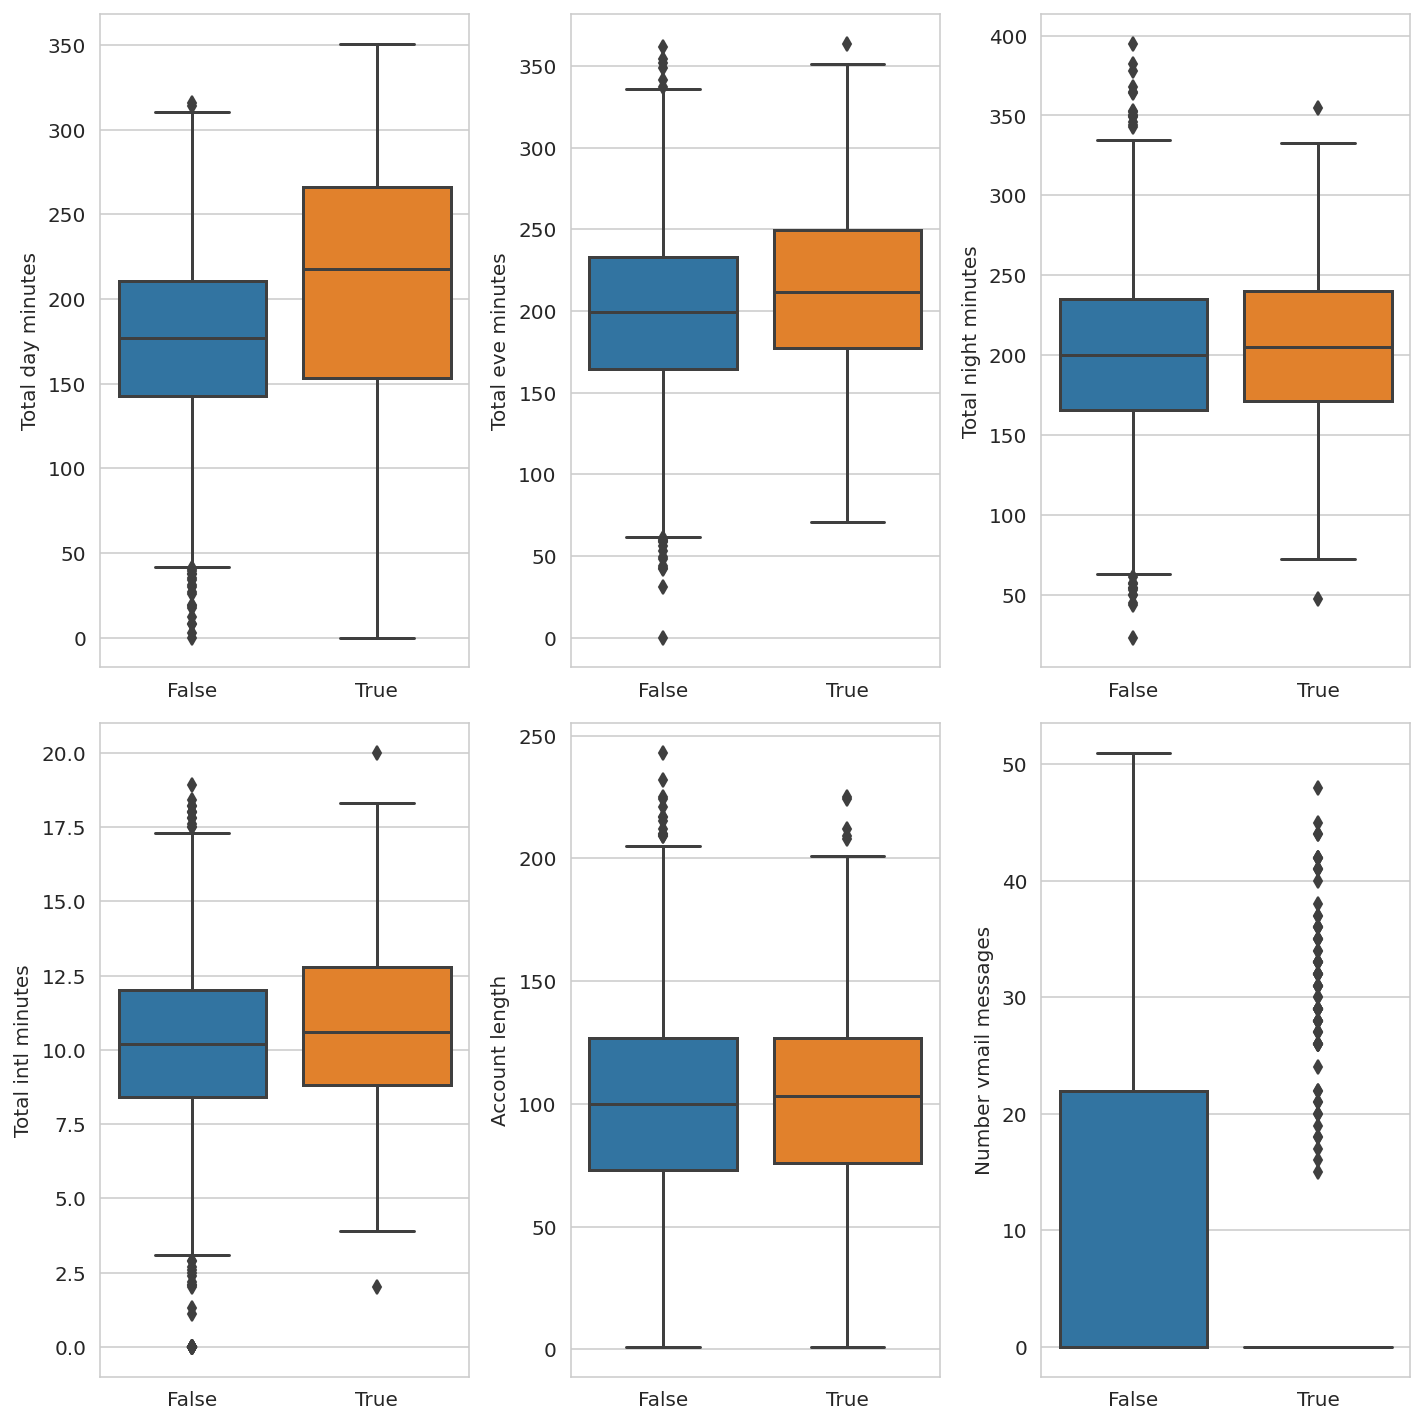

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 3), idx % 3]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

Os gráficos acima nos permitem observar que:

1. Os clientes que saíram tendem a falar mais ao telefone, principalmente durante o dia. Nos demais turnos e ligações internacionais a diferença existe, mas é pequena;'

2. Não se observa diferença significativa entre os gráficos de caixa do atributo "Account lenght", o que significa que não podemos afirmar que os clientes que saem são mais novos ou mais antigos que os que ficaram;

3. Aparentemente os clientes fiéis possuem mais mensagens em correio de voz do que os que saíram.

Vamos checar essa última informação com mais cuidado:


Primeiro vamos verificar quantos clientes possuem o serviço de correio de voz entre os clientes fiéis e os que saíram.

In [ ]:
df.groupby('Churn')['Voice mail plan'].value_counts()

Churn  Voice mail plan
False  False              2008
       True                842
True   False               403
       True                 80
Name: Voice mail plan, dtype: int64

Agora vamos checar quantos desses clientes que possuem o serviço de fato o utilizaram.

In [ ]:
len(df[(df['Voice mail plan']) & (df['Churn'] == True) & (df['Number vmail messages'] > 0)])

80

In [ ]:
len(df[(df['Voice mail plan']) & (df['Churn'] == False) & (df['Number vmail messages'] > 0)])

842

Podemos concluir que todos que contrataram o serviço tiveram pelo menos 1 mensagem no correio de voz. Vamos agora olhar para esse boxplot novamente, dessa vez analisando o consumo apenas dos clientes que possuem o serviço.

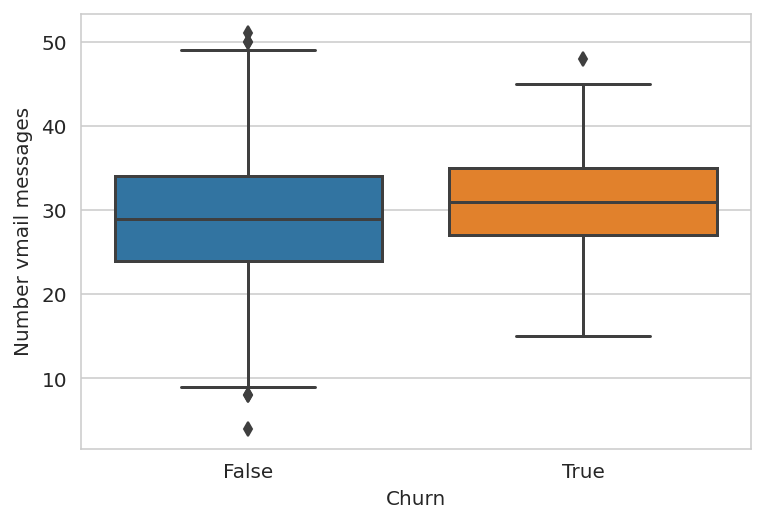

In [ ]:
sns.boxplot(x='Churn', y='Number vmail messages', data=df[df['Voice mail plan']])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


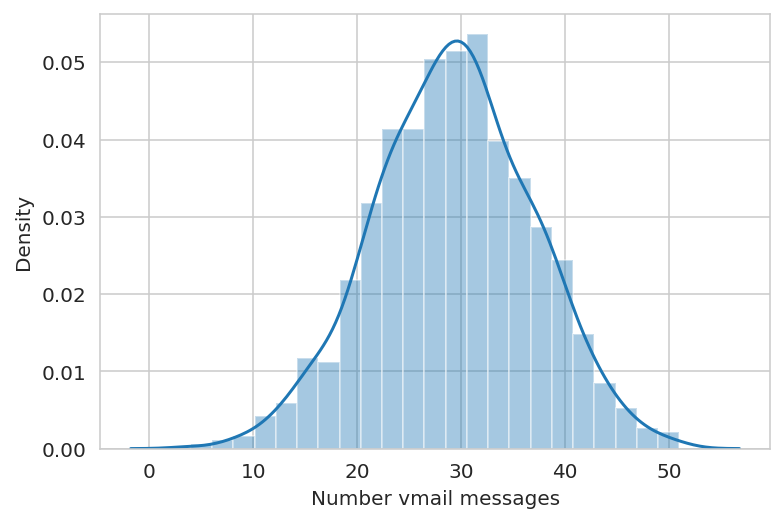

In [ ]:
sns.distplot(df[df['Voice mail plan']]['Number vmail messages'])

Agora podemos perceber que se considerássemos o primeiro gráfico, tomaríamos conclusões equivocadas. O gráfico anterior estava incluindo todos os clientes da base, inclusive os que nem sequer possuem o serviço de correio de voz. Tendo em vista que apenas 80 dos clientes que saíram possuíam o serviço, eles estavam sendo considerados como outliers.

Com essa nova análise, podemos concluir que, dentre os clientes que possuem correio de voz, aqueles que deixaram a empresa utilizavam um pouco mais esse serviço do que os que ficaram.

Além disso, podemos observar que, para os clientes que consomem o serviço de correio de voz, o número de mensagens de voz recebidas segue uma distribuição normal com a média em torno de 30 mensagens.

Com o que analisamos até aqui, podemos tomar uma importante conclusão: 

Em média, os clientes que descontinuam seus contratos são usuários mais ativos dos serviços de comunicação. Talvez eles não estejam satisfeitos com as tarifas, então uma possível medida para segurar mais clientes poderia ser uma redução das tarifas. A empresa precisará realizar análises econômicas adicionais para descobrir se tais medidas seriam benéficas.

Quando queremos analisar uma variável quantitativa em duas dimensões categóricas ao mesmo tempo, existe uma função adequada para isso na biblioteca seaborn chamada `catplot()`. Por exemplo, vamos visualizar a interação entre 'Total day minutes' e duas variáveis categóricas no mesmo gráfico:

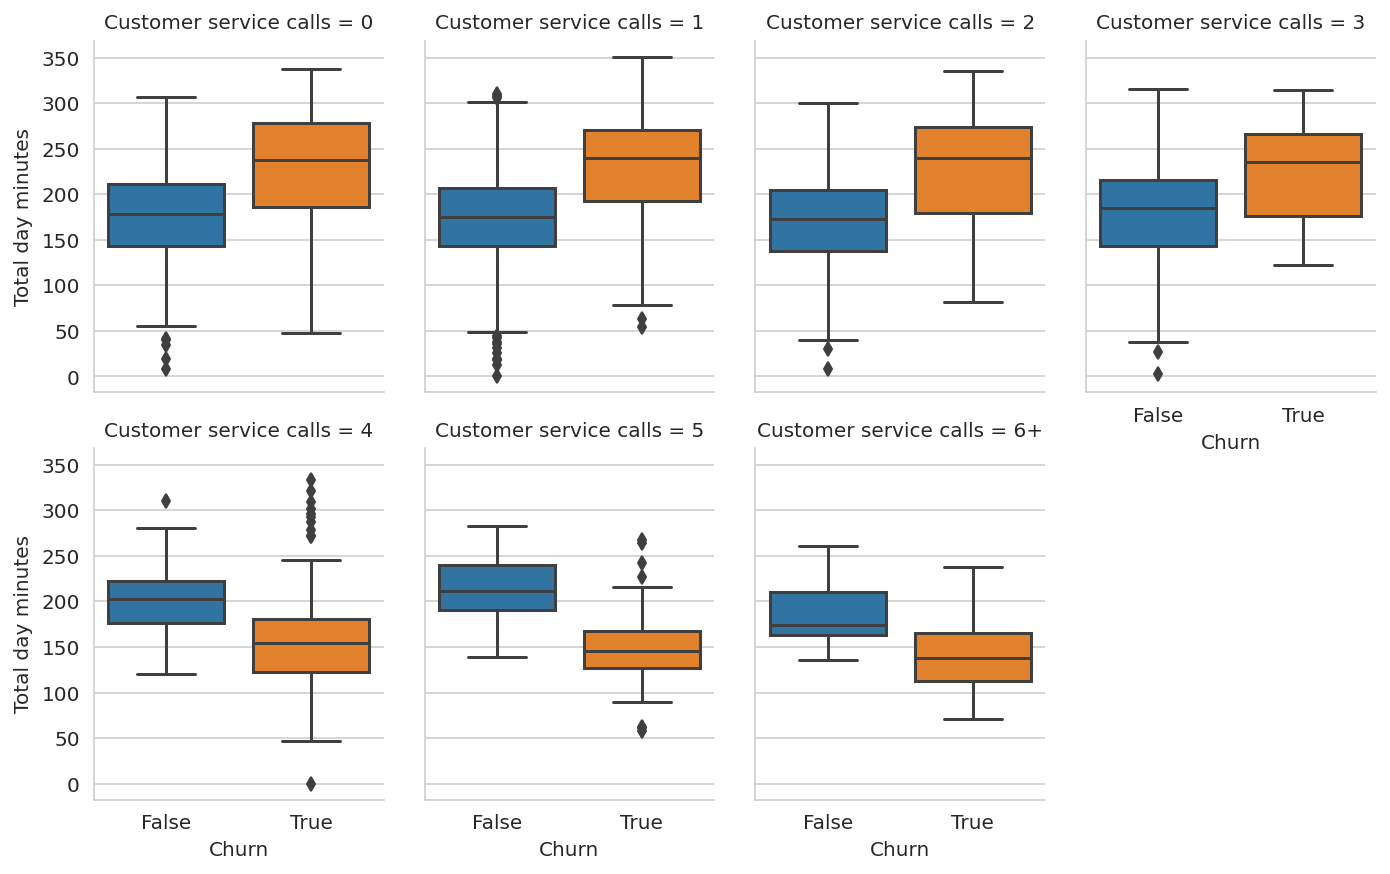

In [ ]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
               data=df, kind="box",
               col_wrap=4, height=3, aspect=.8);

Esse gráfico nos traz outra conclusão importante:

A partir de 4 ligações, o total de minutos diários pode não ser mais o principal fator de rotatividade de clientes. Talvez, para além do nosso palpite anterior sobre as tarifas, existam clientes que estão insatisfeitos com o serviço devido a outros problemas, o que pode levar a um menor número de minutos diários gastos com chamadas.

Outra forma de analisar atributos quantitativos agrupados por atributos categóricos é utilizando a função `groupby()` do pandas. 

In [ ]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 
                   'Total night minutes']

df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

Total day minutes                      ... Total night minutes                     
                  count    mean    std  min  ...                 std   min     50%    max
Churn                                        ...                                         
False            2850.0  175.18  50.18  0.0  ...               51.11  23.2  200.25  395.0
True              483.0  206.91  69.00  0.0  ...               47.13  47.4  204.80  354.9

[2 rows x 18 columns]

Podemos inclusive especificar quais funções de agregação nos interessa:

In [ ]:
df.groupby(['Churn'])[columns_to_show].agg([np.median, np.min, 
                                            np.max])

Total day minutes              ... Total night minutes             
                 median amin   amax  ...              median  amin   amax
Churn                                ...                                 
False             177.2  0.0  315.6  ...              200.25  23.2  395.0
True              217.6  0.0  350.8  ...              204.80  47.4  354.9

[2 rows x 9 columns]

Isso é semelhante a "tabelas dinâmicas" para aqueles familiarizados com o Excel. Tabelas dinâmicas também são implementadas no Pandas: o método `pivot_table()` usa os seguintes parâmetros:

1. `values` - uma lista de variáveis que deseja calcular estatísticas;
2. `index` - uma lista de variáveis para agrupar dados;
3. `aggfunc` - quais funções estatísticas precisamos calcular para osgrupos, ex.: soma, média, máximo, mínimo ou qualquer outra coisa.

Vamos dar uma olhada no número médio de chamadas diurnas, noturnas e noturnas por código de área:


In [ ]:
df.pivot_table(['Total day minutes', 'Total eve minutes', 'Total night minutes'],
               ['Area code'], aggfunc='mean')

,Total day minutes,Total eve minutes,Total night minutes
Area code,,,
408,177.18,201.28,199.21
415,181.59,200.65,202.04
510,178.79,201.32,200.23


Não há diferenças signigicativas no consumo de ligações pelos clientes dos diferentes códigos de área, independentemente do turno.

### Categórico x Categórico

Vamos ver agora a relação direta entre o atributo *Customer service calls* e o nosso target.

Vejamos a distribuição do número de chamadas para a operadora novamente usando um `countplot()`. Dessa vez, vamos gerar gráficos de barras para checar o volume de clientes que deixam a empresa a medida em que ligam mais para a operadora.

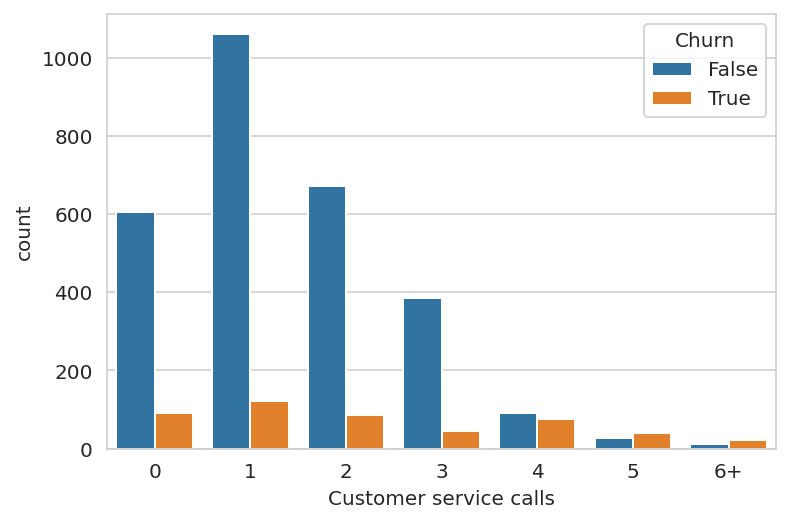

In [ ]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

É fácil ver no gráfico acima que a probabilidade de cancelamento aumenta significativamente após 4 ou mais ligações para a operadora.


Agora, vamos examinar a relação entre "Churn" e os atributos binários, "International plan" e "Voice mail plan".

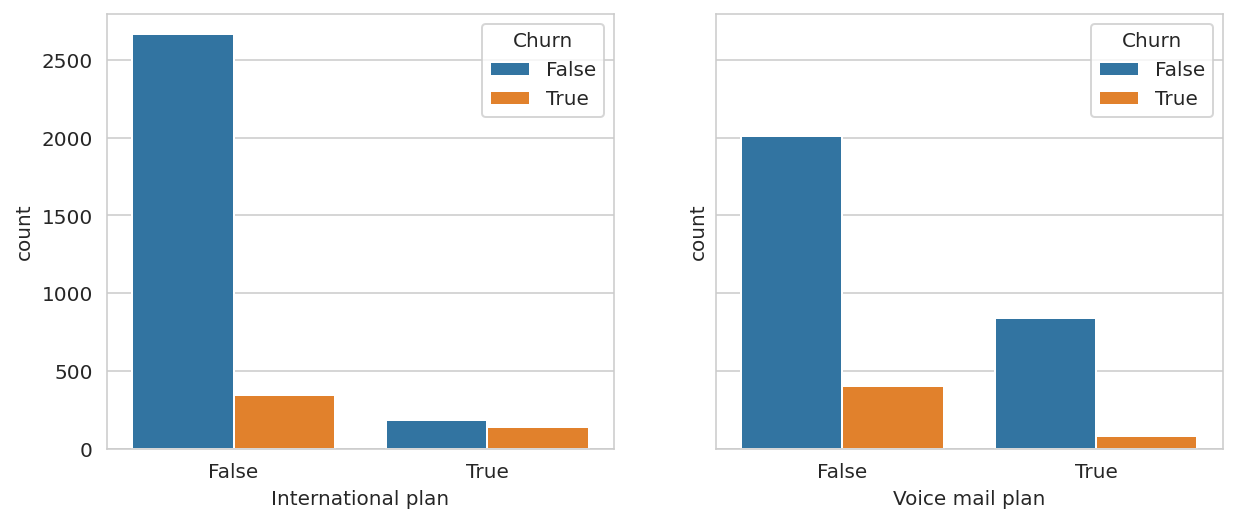

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

Dos gráficos acima podemos observar que quando o plano internacional está habilitado, a taxa de cancelamento é muito maior.

Não observamos o mesmo efeito com o plano de correio de voz.

Além de utilizar meios gráficos para análise categórica, existe uma ferramenta tradicional da estatística: uma tabela de contingência, também chamada de tabulação cruzada. Ele mostra uma distribuição de frequência multivariada de variáveis categóricas em forma tabular. 

Vamos dar uma olhada se existe algum estado com maior taxa de cancelamento.

In [ ]:
pd.crosstab(df['State'], df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,46,50,41,64,53,62,57,51,47,54,53,49,57,69,56,51,54,57,56,56,47,50,56,52,68,68,52,67,37,59,46,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,8,3,3,9,5,9,13,8,4,11,17,13,16,15,7,14,14,11,6,5,9,18,6,14,15,10,9,11,8,6,14,8,5,18,10,5,8,14,7,10,9


Talvez esse tipo de análise fique mais fácil se olharmos para as proporções.

In [ ]:
pd.crosstab(df['State'], df['Churn'], normalize='index').T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,0.94,0.9,0.8,0.94,0.74,0.86,0.84,0.91,0.85,0.87,0.85,0.94,0.93,0.88,0.91,0.87,0.81,0.86,0.92,0.83,0.76,0.79,0.78,0.82,0.89,0.78,0.79,0.84,0.9,0.92,0.84,0.74,0.9,0.79,0.82,0.87,0.85,0.86,0.82,0.91,0.77,0.87,0.91,0.75,0.86,0.94,0.89,0.79,0.91,0.91,0.88
True,0.06,0.1,0.2,0.06,0.26,0.14,0.16,0.09,0.15,0.13,0.15,0.06,0.07,0.12,0.09,0.13,0.19,0.14,0.08,0.17,0.24,0.21,0.22,0.18,0.11,0.22,0.21,0.16,0.1,0.08,0.16,0.26,0.1,0.21,0.18,0.13,0.15,0.14,0.18,0.09,0.23,0.13,0.09,0.25,0.14,0.06,0.11,0.21,0.09,0.09,0.12


Podemos observar que os estados CA, MD, ME, MI, MS, NJ, NV, SC, TX, WA possuem taxas de cancelamento superiores a 20%, o que é considera média nacional, com destaque para os estados da Califórnia e Nova Jersey, que possuem uma taxa de 26%, o que é bastante superior à média nacional, que é de 14%.

Podemos fazer a mesma análise para o atributo "Area code".

In [ ]:
pd.crosstab(df['Area code'], df['Churn'], normalize='index').T

Area code,408,415,510
Churn,,,
False,0.85,0.86,0.85
True,0.15,0.14,0.15


Neste caso podemos observar que o número de cancelamentos é distribuido proporcionalmente entre os diferentes códigos de área.

## Principais informações obtidas dos dados


1. O atributo Churn, nosso target, é binário e fortemente desbalanceado (proporção de 85.5/14.5);

2. Nenhum dos atributos quantitativos possui correlação significativa com o target;

3. Não existem muitos de outliers nos atributos quantitativos . A única excessão a esta regra é o atributo "Number vmail messages", mas isso de dá porque o número de clientes que possuem o serviço de correio de voz é muito reduzido. Quando são considerados apenas os clientes que possuem este serviço, o número de mensagens no correio de voz segue uma distribuição normal;

4. Os atributos relacionados à cobrança de tarifa, número de ligações e total de minutos, seja por turno ou para ligações internacinais, são fortemente correlacionados entre si e cada um deles segue uma distribuição normal;

5. A base possui pouca variação na quantidade de usuários por estado, tendo menor expressão apenas nos estados Pensilvânia, Iowa e Califórnia. Contudo, a taxa de cancelamento varia entre os estados, sendo mais alta nos estados CA, MD, ME, MI, MS, NJ, NV, SC, TX, WA, com destaque para os estados da Califórnia e Nova Jersey, que possuem uma taxa de 26%, o que é bastante superior à média nacional, que é de 14%.

6. O plano de ligações internacionais é pouco utilizado, apenas 10% dos clientes o possui. Contudo, dentre os que possuem esse serviço, a taxa de cancelamento é consideravelmente mais alta;

7. 28% dos clientes possui serviço de correio de voz. Os dados indicam que, dentre os usuários que possuem esse serviço, os que cancelam suas contas o utilizam um pouco mais, mas não é uma diferença expressiva;

8. Em média, os clientes que descontinuam seus contratos são usuários mais ativos dos serviços de comunicação. Essa diferença é mais destacável nas ligações diurnas. Talvez eles não estejam satisfeitos com as tarifas, então uma possível medida para segurar mais clientes poderia ser uma redução das tarifas. A empresa precisará realizar análises econômicas adicionais para descobrir se tais medidas seriam benéficas;

9. Clientes chegam a ligar até 9 vezes para a operadora, porém, clientes que ligam mais de 4 vezes tendem a consumir menos e têm muito mais chances de cancelar as suas contas.





